<a href="https://colab.research.google.com/github/alex06733/Bode/blob/main/Bode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Ordnung Grenzfrequenz: 16.93 Hz
2. Ordnung Grenzfrequenz: 28.42 Hz


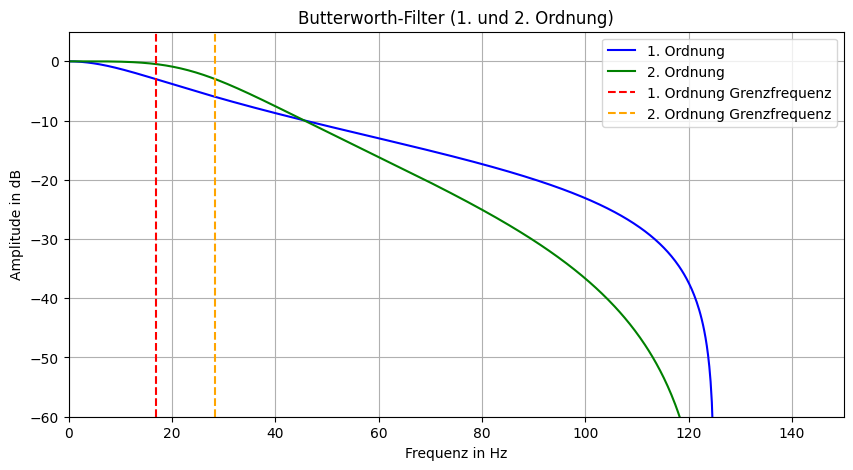

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

sampling_rate = 250  # Samplingrate in Hz
nyquist_freq = sampling_rate / 2  # Nyquist-Frequenz

# Filter 1. Ordnung
order1 = 1  # Ordnung des Filters
R1 = 47e3  # Widerstandswert des Tiefpassfilters
C1 = 200e-9  # Kondensatorwert des Tiefpassfilters
cutoff_freq1 = 1 / (2 * np.pi * R1 * C1)  # Grenzfrequenz in Hz
normalized_cutoff1 = cutoff_freq1 / nyquist_freq  # Normalisierte Grenzfrequenz
print(f"1. Ordnung Grenzfrequenz: {cutoff_freq1:.2f} Hz")

b1, a1 = signal.butter(order1, normalized_cutoff1, btype='low', analog=False)
w1, h1 = signal.freqz(b1, a1)  # w ist Frequenz x-Achse und h ist Frequenzantwort y-Achse
frequencies1 = w1 * nyquist_freq / np.pi  # Konvertiert digitale Frequenzen in Hz

# Filter 2. Ordnung
order2 = 2  # Ordnung des Filters
R2 = 56e3  # Widerstandswert des Tiefpassfilters
C2 = 100e-9  # Kondensatorwert des Tiefpassfilters
cutoff_freq2 = 1 / (2 * np.pi * R2 * C2)  # Grenzfrequenz in Hz
normalized_cutoff2 = cutoff_freq2 / nyquist_freq  # Normalisierte Grenzfrequenz
print(f"2. Ordnung Grenzfrequenz: {cutoff_freq2:.2f} Hz")

b2, a2 = signal.butter(order2, normalized_cutoff2, btype='low', analog=False)
w2, h2 = signal.freqz(b2, a2)  # w ist Frequenz x-Achse und h ist Frequenzantwort y-Achse
frequencies2 = w2 * nyquist_freq / np.pi  # Konvertiert digitale Frequenzen in Hz

# Graph einstellen
plt.figure(figsize=(10, 5))

# Plot für den Filter 1. Ordnung (blau)
plt.plot(frequencies1, 20 * np.log10(np.abs(h1)), 'b', label='1. Ordnung')

# Plot für den Filter 2. Ordnung (grün)
plt.plot(frequencies2, 20 * np.log10(np.abs(h2)), 'g', label='2. Ordnung')

# Legende für die beiden Filter
plt.legend()

plt.xlabel('Frequenz in Hz')
plt.ylabel('Amplitude in dB')
plt.title('Butterworth-Filter (1. und 2. Ordnung)')
plt.grid(True)
plt.xlim(0, 150)  # Frequenzbereich einstellen
plt.ylim(-60, 5)  # Amplitudenbereich einstellen

# Grenzfrequenzen markieren
plt.axvline(x=cutoff_freq1, color='r', linestyle='--', label='1. Ordnung Grenzfrequenz')
plt.axvline(x=cutoff_freq2, color='orange', linestyle='--', label='2. Ordnung Grenzfrequenz')

# Legende aktualisieren und Plot anzeigen
plt.legend()
plt.show()
